# Aprendizado de Representação e Aprendizado Gerativo com Autoencoders e GANs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Concatenate, Flatten, Input
from tensorflow.keras.models import Model, Sequential

In [12]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [3]:
encoder = Sequential()
encoder.add(Dense(2, input_shape=[3]))

In [4]:
decoder = Sequential()
decoder.add(Dense(3, input_shape=[2]))

In [5]:
autoencoder = Sequential([encoder, decoder])

In [10]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

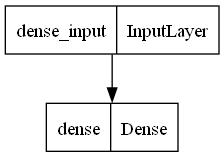

In [6]:
keras.utils.plot_model(encoder)

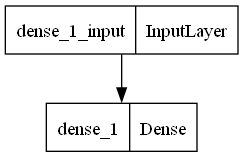

In [7]:
keras.utils.plot_model(decoder)

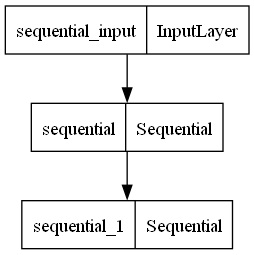

In [8]:
keras.utils.plot_model(autoencoder)

In [11]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 8         
                                                                 
 sequential_1 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20



2/2 [==============================] - 1s 7ms/step - loss: 1.0668
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5734
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3759
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2732
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2126
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1743
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1466
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1277
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0959
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0841
Epoch 

In [14]:
coding = encoder.predict(X_train)

2/2 [==============================] - 0s 3ms/step


In [17]:
X_train

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [15]:
coding

array([[-0.5982046 , -0.55589664],
       [-0.1187586 , -0.03560308],
       [-0.5758054 , -0.5239968 ],
       [-0.51051104, -0.5443946 ],
       [-0.30420685, -0.4586602 ],
       [ 0.70020145,  0.6131593 ],
       [-0.4953398 , -0.5611631 ],
       [ 0.37411618,  0.3954002 ],
       [ 0.7131663 ,  0.54024917],
       [ 0.28385878,  0.27411932],
       [-0.6029955 , -0.5701151 ],
       [ 0.5466423 ,  0.63330215],
       [-0.5732842 , -0.5591544 ],
       [-0.4905575 , -0.5238176 ],
       [ 0.5726885 ,  0.6186864 ],
       [-0.24023764, -0.22558574],
       [ 0.34775692,  0.40758154],
       [ 0.35443598,  0.34937334],
       [ 0.44641882,  0.5089904 ],
       [-0.72031343, -0.57975924],
       [ 0.3799267 ,  0.25312626],
       [-0.69614357, -0.50323653],
       [-0.63891214, -0.5569995 ],
       [-0.6295744 , -0.62110376],
       [ 0.7278829 ,  0.65499115],
       [ 0.49326625,  0.52763385],
       [-0.20000224, -0.19809304],
       [ 0.6204728 ,  0.6146151 ],
       [-0.572399  ,

In [20]:
coding = encoder.predict(X_train)

2/2 [==============================] - 0s 3ms/step


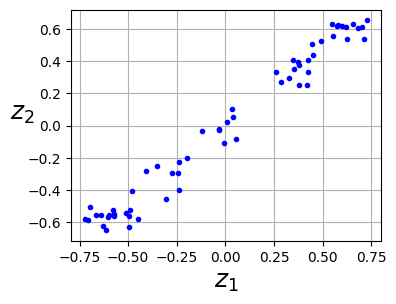

In [21]:
fig = plt.figure(figsize=(4,3))
plt.plot(coding[:,0], coding[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
#save_fig("linear_autoencoder_pca_plot")
plt.show()

## Autoencoders Empilhados

In [76]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
stacked_encoder = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(100, activation="selu"),
    Dense(30, activation="selu"),
])

In [8]:
stacked_decoder = Sequential([
    Dense(100, activation="selu", input_shape=[30]),
    Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [9]:
stacked_ar = Sequential([stacked_encoder, stacked_decoder])

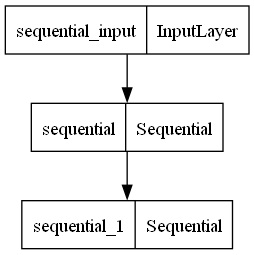

In [10]:
keras.utils.plot_model(stacked_ar)

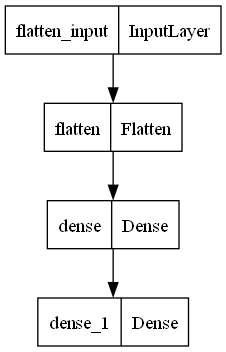

In [11]:
keras.utils.plot_model(stacked_encoder)

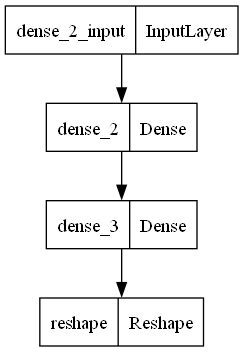

In [12]:
keras.utils.plot_model(stacked_decoder)

In [13]:
stacked_ar.compile(loss="binary_crossentropy", optimizer="sgd")

In [34]:
history = stacked_ar.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6533 - val_loss: 0.5873
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5313 - val_loss: 0.5040
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4923 - val_loss: 0.4866
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4757 - val_loss: 0.4694
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4568 - val_loss: 0.4493
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4356 - val_loss: 0.4272
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - val_loss: 0.4067
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - val_loss: 0.3926
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3854 - val_loss: 0.3841
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.378

In [35]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [36]:
def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1+n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 21ms/step


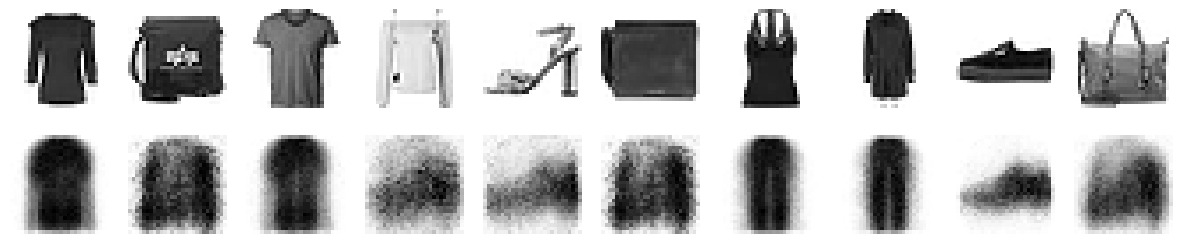

In [38]:
show_reconstructions(stacked_ar, n_images=10)

In [39]:
from sklearn.manifold import TSNE

In [40]:
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()

157/157 [==============================] - 0s 1ms/step


In [41]:
X_valid_2D = tsne.fit_transform(X_valid_compressed)

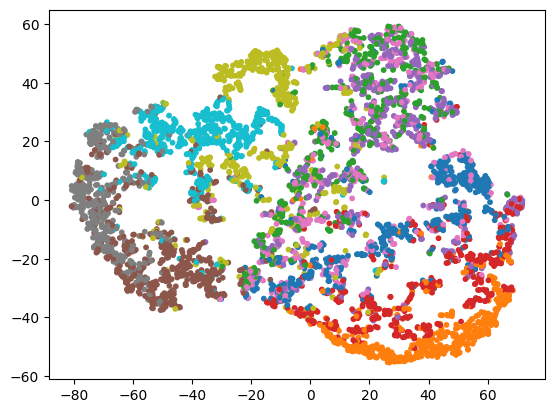

In [42]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

## Amarrar os Pesos

In [59]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [60]:
dense_1 = Dense(100, activation="selu")
dense_2 = Dense(30, activation="selu")

tied_encoder = Sequential([
    Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

In [61]:
tied_decoder = Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [62]:
tied_ae = Sequential([tied_encoder, tied_decoder])

In [64]:
tied_ae.compile(loss="binary_crossentropy", optimizer="sgd")

In [65]:
history = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6584 - val_loss: 0.6043
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5586 - val_loss: 0.5313
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5149 - val_loss: 0.5015
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4864 - val_loss: 0.4749
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4614 - val_loss: 0.4521
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4401 - val_loss: 0.4327
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4221 - val_loss: 0.4161
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4067 - val_loss: 0.4020
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - val_loss: 0.3903
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.383

1/1 [==============================] - 0s 22ms/step


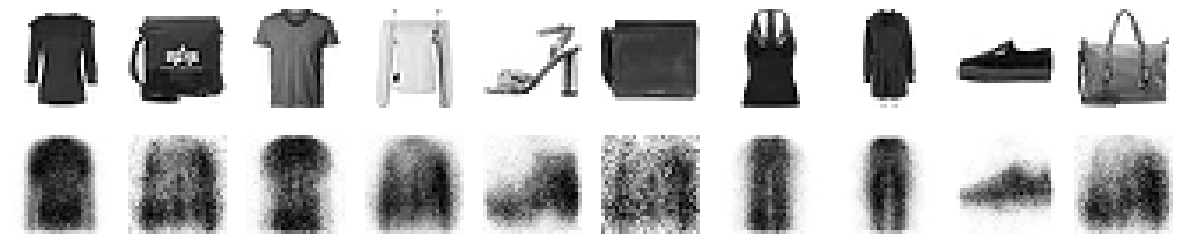

In [67]:
show_reconstructions(tied_ae, n_images=10)

## Autoencoders Convolucionais

In [72]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

In [73]:
conv_decoder = Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu", input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [74]:
conv_ae = Sequential([conv_encoder, conv_decoder])

In [75]:
conv_ae.compile(loss="binary_crossentropy", optimizer="sgd")

In [77]:
history = conv_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5699 - val_loss: 0.4424
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3897 - val_loss: 0.3698
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3577 - val_loss: 0.3505
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3424 - val_loss: 0.3388
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3329 - val_loss: 0.3310
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3261 - val_loss: 0.3250
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3207 - val_loss: 0.3203
Epoch 8/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3165 - val_loss: 0.3165
Epoch 9/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3131 - val_loss: 0.3135
Epoch 10/10
1719/1719 [==============================] - 15s 9ms/step - l

1/1 [==============================] - 0s 280ms/step


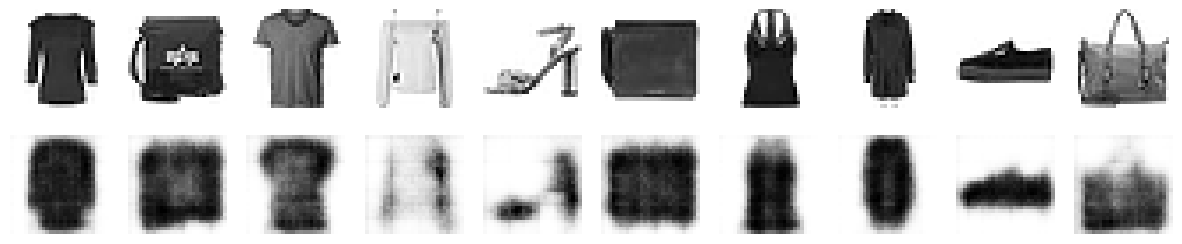

In [78]:
show_reconstructions(conv_ae, n_images=10)

In [79]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=["accuracy"])

In [80]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10



1719/1719 [==============================] - 58s 30ms/step - loss: 0.5023 - accuracy: 0.0451 - val_loss: 0.4307 - val_accuracy: 0.0501
Epoch 2/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.3945 - accuracy: 0.0534 - val_loss: 0.3711 - val_accuracy: 0.0578
Epoch 3/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.3625 - accuracy: 0.0666 - val_loss: 0.3584 - val_accuracy: 0.0691
Epoch 4/10
1719/1719 [==============================] - 54s 32ms/step - loss: 0.3494 - accuracy: 0.0737 - val_loss: 0.3501 - val_accuracy: 0.0691
Epoch 5/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.3412 - accuracy: 0.0748 - val_loss: 0.3377 - val_accuracy: 0.0742
Epoch 6/10
1719/1719 [==============================] - 49s 29ms/step - loss: 0.3344 - accuracy: 0.0760 - val_loss: 0.3430 - val_accuracy: 0.0665
Epoch 7/10
1719/1719 [==============================] - 54s 31ms/step - loss: 0.3282 - accuracy: 0.0766 - val_loss: 0.3272 - val_accura

1/1 [==============================] - 2s 2s/step


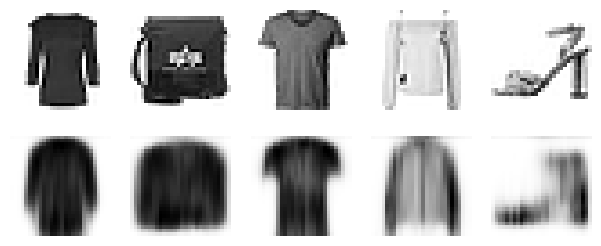

In [81]:
show_reconstructions(recurrent_ae)
plt.show()

In [3]:
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

Gerando imagens

In [15]:
coding_size = 10

inputs = Input(shape=[28, 28])
z = Flatten()(inputs)
z = Dense(150, activation="selu")(z)
z = Dense(100, activation="selu")(z)
coding_mean = Dense(coding_size)(z)
coding_log_var = Dense(coding_size)(z)
codings = Sampling()([coding_mean, coding_log_var])
variational_encoder = Model(inputs=[inputs], outputs=[coding_mean, coding_log_var, codings])

In [16]:
decoder_inputs = Input(shape=coding_size)
x = Dense(100, activation="selu")(decoder_inputs)
x = Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = Model(inputs=[decoder_inputs], outputs=[outputs])

In [17]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = Model(inputs=[inputs], outputs=[reconstructions])

In [18]:
latent_loss = -0.5 * K.sum(
    1 + coding_log_var - K.exp(coding_log_var) - K.square(coding_mean),
    axis=-1
)

In [19]:
variational_ae.add_loss(K.mean(latent_loss)/784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [20]:
history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_valid, X_valid))

Epoch 1/50

430/430 [==============================] - 5s 6ms/step - loss: 0.4270 - val_loss: 0.3753
Epoch 2/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3663 - val_loss: 0.3607
Epoch 3/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3544 - val_loss: 0.3499
Epoch 4/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3481 - val_loss: 0.3464
Epoch 5/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3438 - val_loss: 0.3434
Epoch 6/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3406 - val_loss: 0.3414
Epoch 7/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3385 - val_loss: 0.3392
Epoch 8/50
430/430 [==============================] - 2s 6ms/step - loss: 0.3368 - val_loss: 0.3429
Epoch 9/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3354 - val_loss: 0.3391
Epoch 10/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3341 - val_loss: 0.337

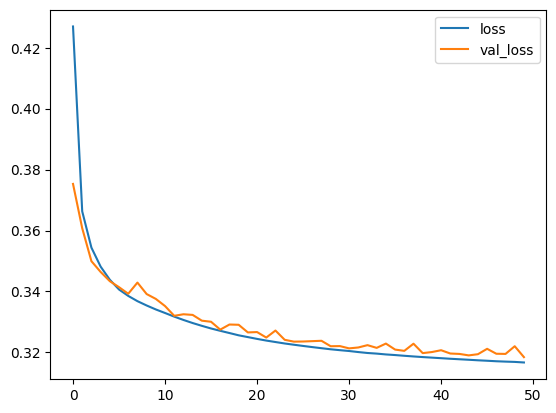

In [21]:
pd.DataFrame(history.history).plot();

In [22]:
codings = tf.random.normal(shape=[12, coding_size])
images = variational_decoder(codings).numpy()

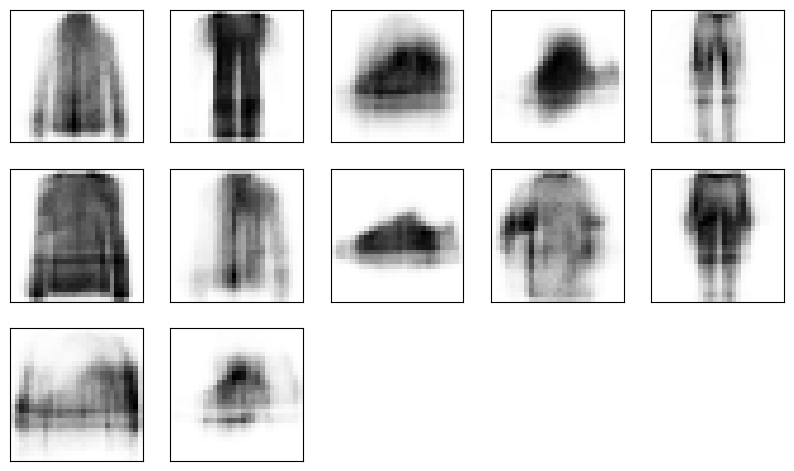

In [33]:
plt.figure(figsize=[10,10])
for i in range(12):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i], cmap=plt.cm.binary)

plt.show()

In [34]:
codings_grid = tf.reshape(codings, [1, 3, 4, coding_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_coding = tf.reshape(larger_grid, [-1, coding_size])
images = variational_decoder(interpolated_coding).numpy()

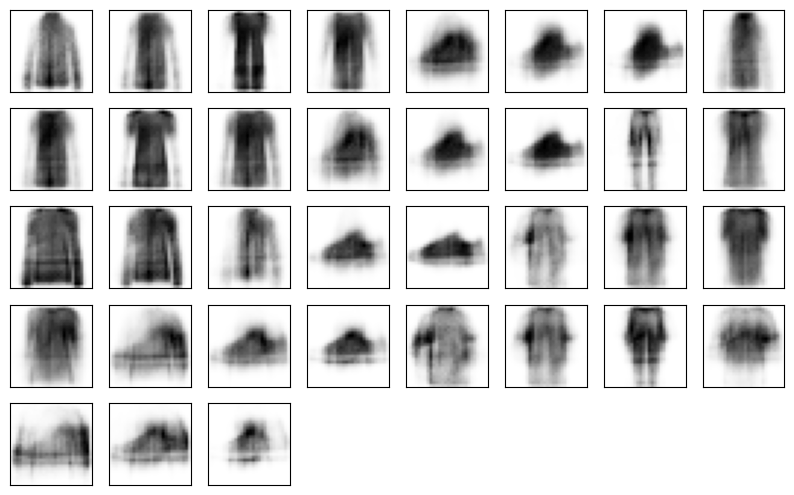

In [39]:
plt.figure(figsize=[10,10])
for i in range(35):    # for first 25 images
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i], cmap=plt.cm.binary)

plt.show()

## Redes Adversárias Gerativas

In [40]:
coding_size = 30

In [41]:
generator = Sequential([
    Dense(100, activation="selu", input_shape=[coding_size]),
    Dense(150, activation="selu"),
    Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [42]:
discriminator = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(150, activation="selu"),
    Dense(100, activation="selu"),
    Dense(1, activation="sigmoid")
])

In [43]:
gan = Sequential([generator, discriminator])

In [44]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [45]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [49]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()     

Epoch 1/1


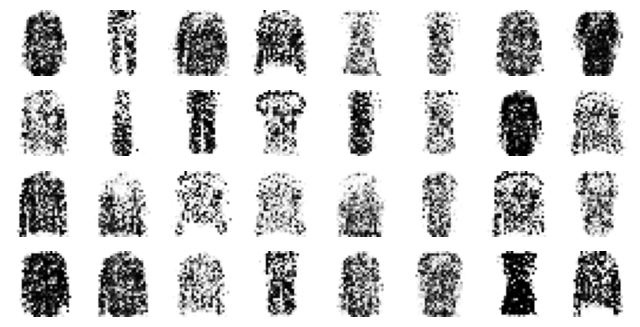

In [50]:
train_gan(gan, dataset, batch_size, coding_size, n_epochs=1)


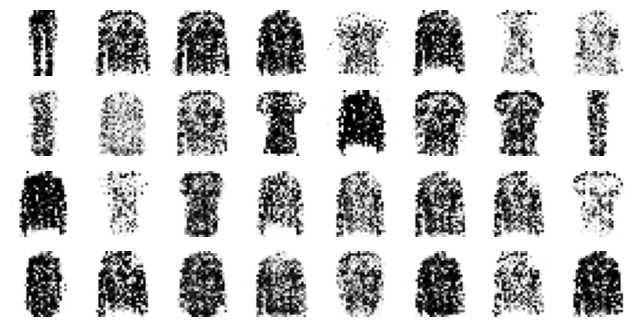

In [52]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, coding_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

## GANs Convolucionais Profundas

In [53]:
codings_size = 100

In [88]:
generator = Sequential([
    Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    BatchNormalization(),

    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME", activation="tanh")
])

In [89]:
discriminator = Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
    Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2)),
    Dropout(0.4),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [90]:
gan = Sequential([generator, discriminator])

In [91]:
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [92]:
gan.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])